# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing the libraries

In [1]:
#Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

# Reading the dataset

In [3]:
#Readinh the csv files
bike_rental=pd.read_csv(r"C:\Users\Akshay\Downloads\day.csv")
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the number of rows & columns in the dataframe
bike_rental.shape

(730, 16)

In [5]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking the summary for numeric columns
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Checking the data quality

**CHECKING FOR NULL VALUES**

In [7]:
#Finding the % of null values in each column
round(100*bike_rental.isnull().sum()/len(bike_rental),2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

There are no null values.

# Checking for any Duplicates

In [8]:
Duplicate=bike_rental.copy()

In [9]:
Duplicate.drop_duplicates(inplace=True,subset=None)
Duplicate.drop_duplicates(inplace=True,subset=None)
Duplicate.shape

(730, 16)

In [10]:
bike_rental.shape

(730, 16)

There are no duplicates found as the shape of orginal dataset & duplicate dataset is the same.

# Checking for any outliers

There are no otliers as there is negligible difference between median & mean.

# Data Visualization

**NUMERIC VARIABLES VISUALIZATION**

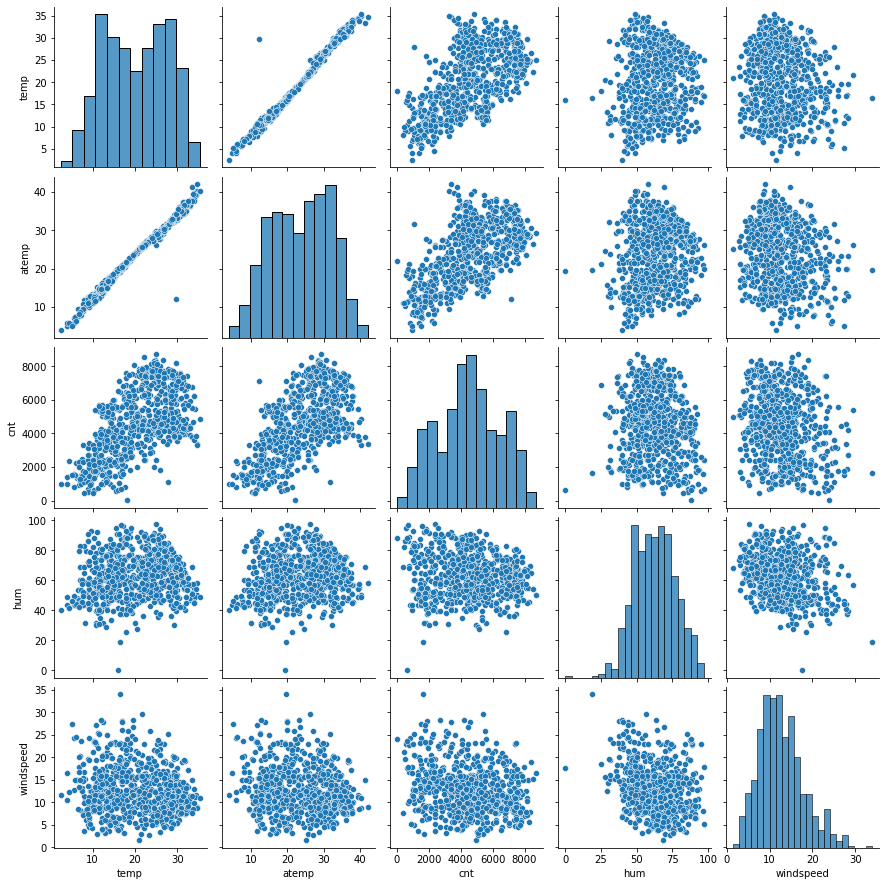

In [11]:
#pairplot
sns.pairplot(data=bike_rental, vars =["temp","atemp","cnt","hum","windspeed"])
plt.show()

**CATEGORICAL VARIABLES VISUALIZATION**

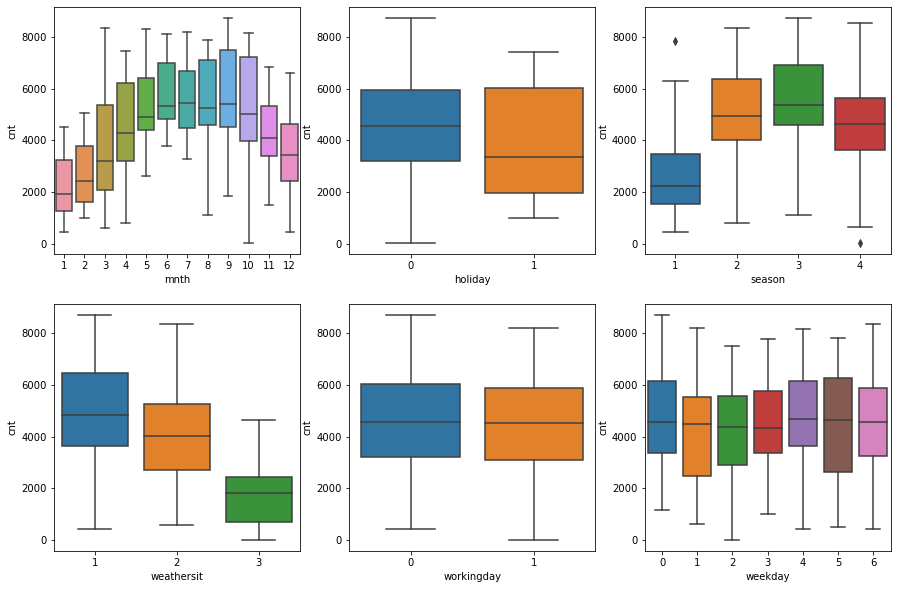

In [12]:
#Boxplot for all categorical variables against the target varible cnt
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)

sns.boxplot(x="mnth",y="cnt",data=bike_rental)

plt.subplot(2,3,2)

sns.boxplot(x="holiday",y="cnt",data=bike_rental)

plt.subplot(2,3,3)

sns.boxplot(x="season",y="cnt",data=bike_rental)

plt.subplot(2,3,4)

sns.boxplot(x="weathersit",y="cnt",data=bike_rental)

plt.subplot(2,3,5)

sns.boxplot(x="workingday",y="cnt",data=bike_rental)

plt.subplot(2,3,6)

sns.boxplot(x="weekday",y="cnt",data=bike_rental)

plt.show()

1.During Holidays, the cnt values decreases

2.During spring, the count of bikes rented is very less as compared to other seasons

3.There is increase in cnt values in summer season

# Preparing the data for analysis

In [13]:
#Dropping all the unnecessary columns
bike_rental.drop(["dteday","registered","instant","casual"],inplace=True,axis=1)

In [14]:
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Conversion of numeric columns to categorical type

import calendar

In [16]:
bike_rental["mnth"]=bike_rental["mnth"].apply(lambda x:calendar.month_abbr[x])

In [17]:
#Weathersit Mapping

bike_rental.weathersit=bike_rental.weathersit.map({1:"Clear",
                                                  2:"Mist & Cloudy",
                                                  3:"Light Snow & Rain",
                                                  4:"Heavy Snow & Rain"})

In [18]:
#Mappimg weekday
bike_rental.weekday=bike_rental.weekday.map({0:"Sunday",
                                                  1:"Monday",
                                                  2:"Tuesday",
                                                  3:"Wednesday",
                                               4:"Thursday",
                                                5:"Friday",
                                                6:"Saturday"})

In [19]:
#Mapping Seasons
bike_rental.season=bike_rental.season.map({1:"Spring",
                                                  2:"Summer",
                                                  3:"Fall",
                                                  4:"Winter"})

In [20]:
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Creating Dummy Variables

In [21]:
Dummy_var=bike_rental[["mnth","weathersit","weekday","season"]]

Dummy_var=pd.get_dummies(Dummy_var,drop_first=True)

In [22]:
#Addition of Dummy_var to the main dataset
bike_rental=pd.concat([Dummy_var,bike_rental],axis=1)

bike_rental.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
#Dropping such columns for which the dummmy variables where created
bike_rental.drop(["mnth","weathersit","weekday","season"],inplace=True,axis=1)

bike_rental.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_Summer,season_Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


# Performing Train-Test Split

In [24]:
#Splitting the dataframes

from sklearn.model_selection import train_test_split

Train,Test=train_test_split(bike_rental,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
#Feature Rescaling
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#Application of scaler to the columns 
var=["windspeed","temp","atemp","cnt","hum"]

Train[var]=scaler.fit_transform(Train[var])


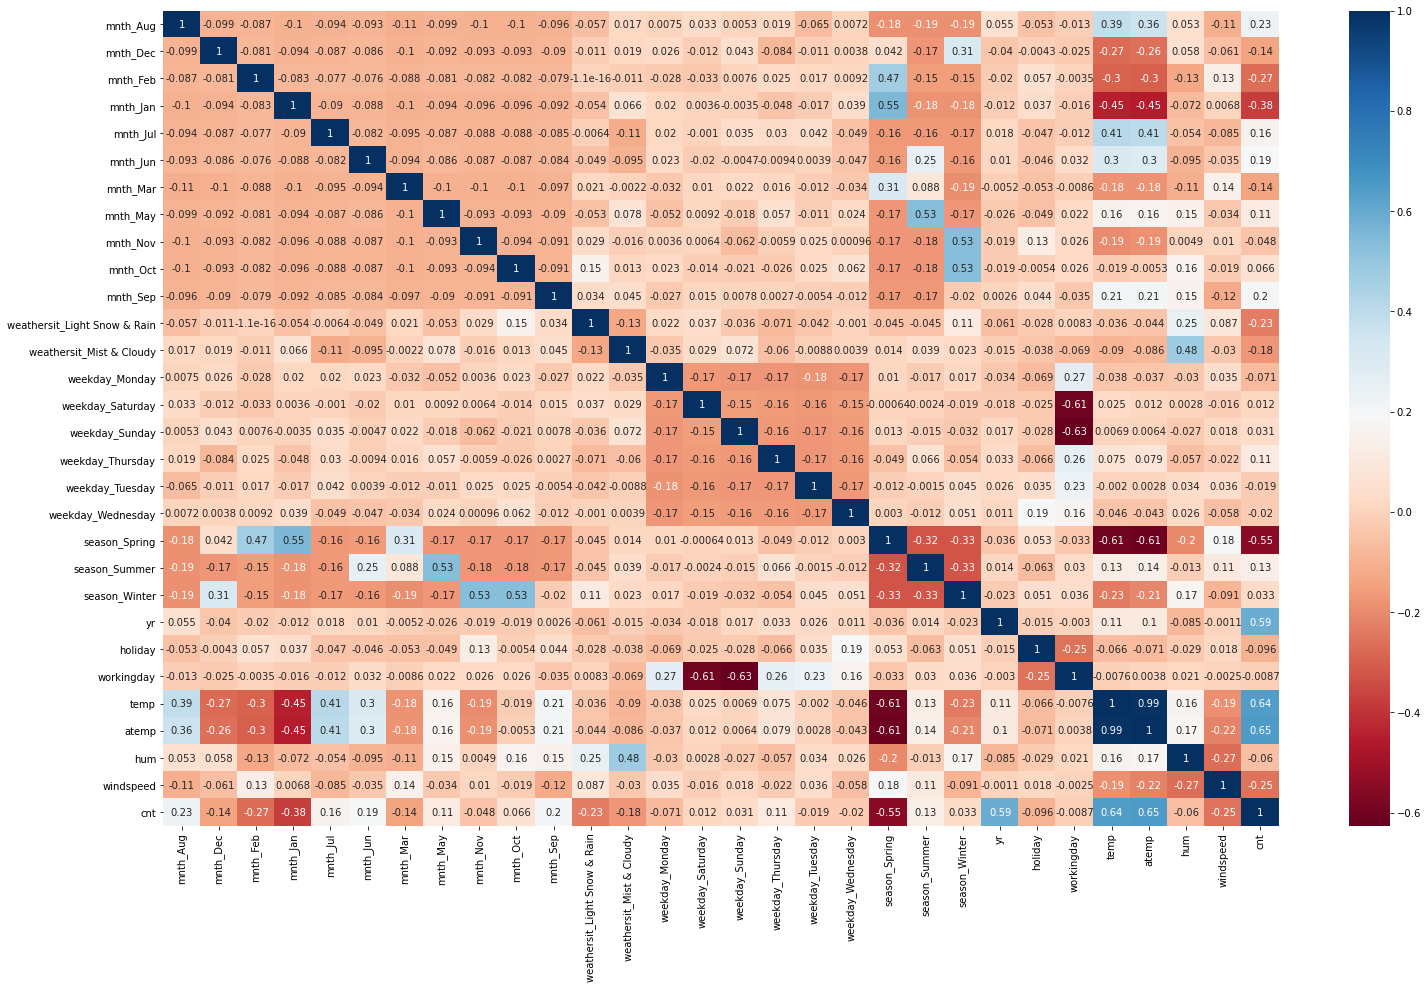

In [26]:
#Correlation coeeficient

plt.figure(figsize=(25,15))

sns.heatmap(Train.corr(),cmap="RdBu",annot=True)
plt.show()


# Build a Linear Model

**X & Y DIVISION FOR MODEL BUILDING**

In [27]:
train_y=Train.pop("cnt")

train_x=Train

**Recursive Feature Elimination(RFE)**

In [28]:
from sklearn.feature_selection import RFE
LM=LinearRegression()

LM.fit(train_x,train_y)

rfe=RFE(LM,13)

rfe=rfe.fit(train_x,train_y)

list(zip(train_x.columns,rfe.support_,rfe.ranking_))

[('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

# Building Linear Model using STATS MODEL

**MODEL 1**

In [29]:
column=train_x.columns[rfe.support_]

column

Index(['mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [30]:
train_x.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [31]:
#Creating x_test df
train_x_rfe=train_x[column]

In [32]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Adding a constant
train_x_rfe=sm.add_constant(train_x_rfe)

In [33]:
#Creating a fiited model
LM=sm.OLS(train_y,train_x_rfe).fit()

In [34]:
#Check the obtained parameters
LM.params

const                           0.295720
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
dtype: float64

In [35]:
#printing summary
LM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.45e-190
Time:                        20:04:19   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2957      0.035      8.466      0.000       0.227       0.364
mnth_Jan                        -0.0331      0.018     -1.881      0.061      -0.068       0.001
mnth_Jul                        -0.0559      0.018     -3.056      0.002      -0.092      -0.020
mnth_Sep                         0.0825      0.017      4.940      0.000       0.050       0.115
weathersit_Light Snow & Rain    -0.2405      0.026     -9.135      0.000      -0.292      -0.189
weathersit_Mist & Cloudy        -0.0541      0.010     -5.159      0.000      -0.075      -0.034
season_Spring                   -0.0518      0.021     -2.472      0.014      -0.093      -0.011
season_Summer                    0.0491      0.015      3.259      0.001       0.019       0.079
season_Winter                    0.0931      0.017      5.324      0.000       0.059       0.127
yr                               0.2301      0.008     28.348      0.000       0.214       0.246
holiday                         -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp                             0.5127      0.035     14.720      0.000       0.444       0.581
hum                             -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed                       -0.1871      0.026     -7.243      0.000      -0.238      -0.136
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Drop HUM
new_t=train_x_rfe.drop(["hum"],axis=1)

**MODEL 2**

In [37]:
#add constant
train_x_new=sm.add_constant(new_t)

In [38]:
#Creating a fiited model
LM=sm.OLS(train_y,train_x_new).fit()

In [39]:
#printing summary
LM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.97e-187
Time:                        20:04:19   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2155      0.030      7.096      0.000       0.156       0.275
mnth_Jan                        -0.0380      0.018     -2.125      0.034      -0.073      -0.003
mnth_Jul                        -0.0507      0.019     -2.728      0.007      -0.087      -0.014
mnth_Sep                         0.0762      0.017      4.500      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weathersit_Mist & Cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
season_Spring                   -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_Summer                    0.0422      0.015      2.766      0.006       0.012       0.072
season_Winter                    0.0771      0.017      4.424      0.000       0.043       0.111
yr                               0.2342      0.008     28.524      0.000       0.218       0.250
holiday                         -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                             0.4728      0.034     13.803      0.000       0.405       0.540
windspeed                       -0.1549      0.025     -6.140      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**VIF CHECK**

In [40]:
#VIF for new Model
ViF=pd.DataFrame()

new=new_t

ViF["Features"]=new.columns

ViF["VIF"]=[variance_inflation_factor(new.values,i) for i in range(new.shape[1])]

ViF["VIF"]=round(ViF["VIF"],2)

ViF=ViF.sort_values(by="VIF",ascending=False)

print(ViF)

                        Features    VIF
0                          const  55.94
6                  season_Spring   5.03
11                          temp   3.62
8                  season_Winter   3.44
7                  season_Summer   2.61
1                       mnth_Jan   1.56
2                       mnth_Jul   1.48
3                       mnth_Sep   1.29
12                     windspeed   1.11
4   weathersit_Light Snow & Rain   1.05
5       weathersit_Mist & Cloudy   1.05
9                             yr   1.02
10                       holiday   1.02


In [41]:
new_t=train_x_rfe.drop(["const"],axis=1)

In [42]:
#VIF for new Model
ViF=pd.DataFrame()
new=new_t

ViF["Features"]=new.columns

ViF["VIF"]=[variance_inflation_factor(new.values,i) for i in range(new.shape[1])]

ViF["VIF"]=round(ViF["VIF"],2)

ViF=ViF.sort_values(by="VIF",ascending=False)

print(ViF)

                        Features    VIF
11                           hum  29.05
10                          temp  16.70
12                     windspeed   4.66
5                  season_Spring   4.34
7                  season_Winter   3.38
6                  season_Summer   2.78
4       weathersit_Mist & Cloudy   2.28
8                             yr   2.09
0                       mnth_Jan   1.67
1                       mnth_Jul   1.59
2                       mnth_Sep   1.38
3   weathersit_Light Snow & Rain   1.24
9                        holiday   1.04


**MODEL 3**

In [43]:
#Drop hum
new_t=train_x_rfe.drop(["hum"],axis=1)

In [44]:
#add constant
train_x_new1=sm.add_constant(new_t)

In [45]:
#Creating a fiited model
LM=sm.OLS(train_y,train_x_new1).fit()

In [46]:
#printing summary
LM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.97e-187
Time:                        20:04:20   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2155      0.030      7.096      0.000       0.156       0.275
mnth_Jan                        -0.0380      0.018     -2.125      0.034      -0.073      -0.003
mnth_Jul                        -0.0507      0.019     -2.728      0.007      -0.087      -0.014
mnth_Sep                         0.0762      0.017      4.500      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weathersit_Mist & Cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
season_Spring                   -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_Summer                    0.0422      0.015      2.766      0.006       0.012       0.072
season_Winter                    0.0771      0.017      4.424      0.000       0.043       0.111
yr                               0.2342      0.008     28.524      0.000       0.218       0.250
holiday                         -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                             0.4728      0.034     13.803      0.000       0.405       0.540
windspeed                       -0.1549      0.025     -6.140      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#VIF for new Model
ViF=pd.DataFrame()
new=train_x_new1

ViF["Features"]=new.columns

ViF["VIF"]=[variance_inflation_factor(new.values,i) for i in range(new.shape[1])]

ViF["VIF"]=round(ViF["VIF"],2)

ViF=ViF.sort_values(by="VIF",ascending=False)

print(ViF)

                        Features    VIF
0                          const  55.94
6                  season_Spring   5.03
11                          temp   3.62
8                  season_Winter   3.44
7                  season_Summer   2.61
1                       mnth_Jan   1.56
2                       mnth_Jul   1.48
3                       mnth_Sep   1.29
12                     windspeed   1.11
4   weathersit_Light Snow & Rain   1.05
5       weathersit_Mist & Cloudy   1.05
9                             yr   1.02
10                       holiday   1.02


# Assumptions

In [48]:
train_y_cnt=LM.predict(train_x_new1)

Text(0.5, 6.79999999999999, 'Erros')

<Figure size 432x288 with 0 Axes>

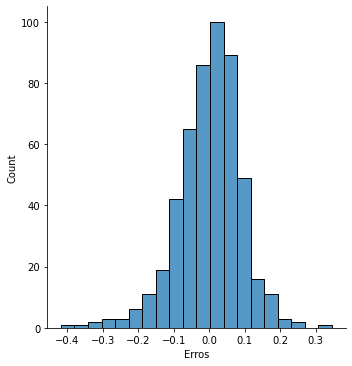

In [49]:
#Plot the histogram
fig=plt.figure()
sns.displot((train_y-train_y_cnt),bins=20)

fig.suptitle("Error Terms",fontsize=15)

plt.xlabel("Erros",fontsize=10)

# final predictions

In [50]:
var=["windspeed","temp","atemp","cnt","hum"]

Test[var]=scaler.fit_transform(Test[var])

Test.describe()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_Summer,season_Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.264840,0.232877,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.442259,0.423633,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
test_y=Test.pop("cnt")

test_x=Test

In [52]:
col_test=train_x_new1.columns

test_x=test_x[col_test[1:]]

test_x=sm.add_constant(test_x)

test_x.info()             

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   mnth_Jan                      219 non-null    uint8  
 2   mnth_Jul                      219 non-null    uint8  
 3   mnth_Sep                      219 non-null    uint8  
 4   weathersit_Light Snow & Rain  219 non-null    uint8  
 5   weathersit_Mist & Cloudy      219 non-null    uint8  
 6   season_Spring                 219 non-null    uint8  
 7   season_Summer                 219 non-null    uint8  
 8   season_Winter                 219 non-null    uint8  
 9   yr                            219 non-null    int64  
 10  holiday                       219 non-null    int64  
 11  temp                          219 non-null    float64
 12  windspeed                     219 non-null    float64
dtypes: f

In [53]:
pred_y=LM.predict(test_x)

In [54]:
r2_score(test_y,pred_y)

0.7915837759340221

# Model Evaluation

Text(0, 0.5, 'pred_y')

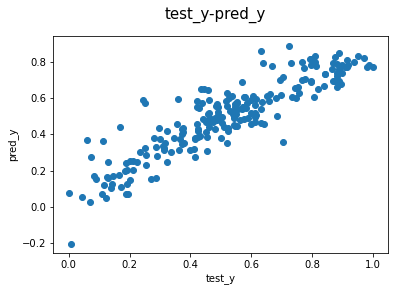

In [55]:
#Plotting a graph
fig=plt.figure()

plt.scatter(test_y,pred_y)

fig.suptitle("test_y-pred_y",fontsize=15)

plt.xlabel("test_y",fontsize=10)

plt.ylabel("pred_y",fontsize=10)

In [56]:
CV=pd.DataFrame(LM.params)

CV.insert(0,"col_var",CV.index)

CV.rename(columns={0:"Coff_Value"},inplace=True)

CV["index"]=list(range(0,13))

CV.set_index("index",inplace=True)

CV.sort_values(by="Coff_Value",inplace=True,ascending=False)

print(CV)



                            col_var  Coff_Value
index                                          
11                             temp    0.472772
9                                yr    0.234197
0                             const    0.215488
8                     season_Winter    0.077050
3                          mnth_Sep    0.076239
7                     season_Summer    0.042205
1                          mnth_Jan   -0.037996
2                          mnth_Jul   -0.050722
6                     season_Spring   -0.061504
5          weathersit_Mist & Cloudy   -0.080675
10                          holiday   -0.097317
12                        windspeed   -0.154925
4      weathersit_Light Snow & Rain   -0.286377


The +ve coeffient values represents the increase in the cnt value whereas the -ve coefficient values represents increase in the
-ve coefficients can increase the cnt value.

Following inferences can be drawn:

1]temp variable shows the highest coefficient value,i.e this is the most important parameter.

2]During the winter season,there are more bikes rented out.

Overall it can be inferred temp & season plays an important role in Bike Rentals.These factors are to be significantly considered for renting out the bikes.
    